**Brian Blaylock**  
**December 7, 2018**

# HRRR OSG for each transmission line point

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import xarray

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_maps.my_basemap import draw_centermap
from BB_HRRR.HRRR_Pando import pluck_hrrr_point, get_hrrr_latlon

## Load the Transmission Line points

In [100]:
oid = []
fid = []
lon = []
lat = []
with open('data/Copy of 100km_data_tlinepts.csv') as csv:
    for b in csv.readlines()[1:]:
        b = b.split(',')
        oid.append(int(b[0]))
        fid.append(int(b[1]))
        lon.append(float(b[-10]))
        lat.append(float(b[-11]))
    

In [110]:
m = draw_centermap(np.mean(lat), np.mean(lon), size=(1.2,1.2))

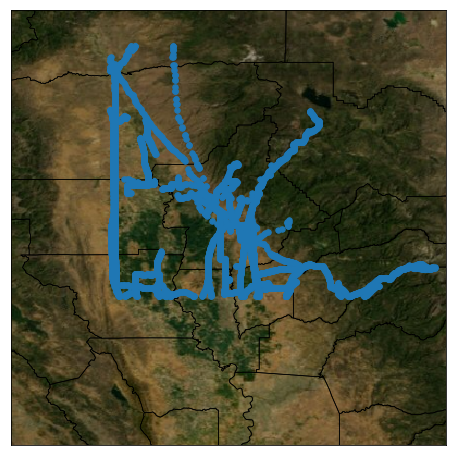

In [111]:
plt.figure(figsize=[8,8])
m.scatter(lon, lat, latlon=True, s=30, zorder=10)
m.drawcounties(linewidth=.7)
m.arcgisimage()

## Load OSG Data

In [140]:
hLATLON = get_hrrr_latlon()
hLAT = hLATLON['lat']
hLON = hLATLON['lon']

In [127]:
DATE = datetime(2016, 1, 1, 1)
variable = 'UVGRD:10 m'
var = variable.replace(':', '_').replace(' ', '_')
DIR = '/uufs/chpc.utah.edu/common/home/horel-group8/blaylock/HRRR_OSG/hourly30/%s/' % var
FILE = 'OSG_HRRR_%s_m%02d_d%02d_h%02d_f00.h5' % (var, DATE.month, DATE.day, DATE.hour)

In [128]:
print(DIR+FILE)

/uufs/chpc.utah.edu/common/home/horel-group8/blaylock/HRRR_OSG/hourly30/UVGRD_10_m/OSG_HRRR_UVGRD_10_m_m01_d01_h01_f00.h5


In [129]:
z = xarray.open_dataset(DIR+FILE)

In [179]:
# Get x and y position
H = {'lat': hLAT,
     'lon': hLON}
x, y = pluck_hrrr_point(H,  lat=lat[0], lon=lon[0], XY_only=True)

 >> Requested Center lat: 40.0074534	 lon: -121.2507257
 >>     Plucked HRRR lat: 40.01884	 lon: -121.25838
 >>     Plucked from   x: 672	   y: 232


In [184]:
for p in z['percentile'].data:
    print(z['p%02d' % p].data[x,y])

1.012
1.11
1.18
1.187
1.196
1.207
1.472
2.01
2.164
2.903
3.449
3.702
4.037
4.813
4.977
5.268
5.76
6.077
6.316
